In [214]:
import numpy as np
import matplotlib as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import sys

In [211]:
print("Python version: ", sys.version)
print(f"numpy version: ", np.__version__)
print(f"matplotlib version: ", ma.__version__)
print(f"pandas version: ", pd.__version__)
print(f"seaborn version: ", sns.__version__)

Python version:  3.9.10 (main, Jan 15 2022, 11:40:53) 
[Clang 13.0.0 (clang-1300.0.29.3)]
numpy version:  1.22.1
matplotlib version:  3.5.1
pandas version:  1.4.1
seaborn version:  0.11.2


# <span style="color:red"> Day 4 Items</span>

In [7]:
# open csv into DataFrame
df = pd.read_csv('./Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [30]:
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [19]:
df.keys()

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

### <span style="color:orange"> Q1. How many different companies are represented in the dataset? </span>
### A1: 439

In [176]:
len(df['Company Name'].dropna().unique())

439

### <span style="color:orange"> Q2. What is the total number of jobs created for businesses in Queens? </span>
### A2: 90

In [45]:
# check if duplicate companies have valid values for `Job created`` -- if yes, figure out a way to average those?
df[df.duplicated(['Company Name'], keep=False)][['Company Name', 'Job created']]

,Company Name,Job created
33,Albert Einstein College of Medicine R&D,NaN
34,Albert Einstein College of Medicine R&D,NaN
160,FEDERAL EXPRESS,NaN
161,FEDERAL EXPRESS,NaN
162,FEDERAL EXPRESS,NaN
171,FRESH DIRECT LLC,NaN
172,FRESH DIRECT LLC,NaN
226,"JetBlue Airways, Corp.",NaN
227,"JetBlue Airways, Corp.",NaN
241,"KEPCO, INC.",NaN


In [49]:
# Fortunately the Job created are all NaN for the duplicates! Let us now group by 'City' and get total Job created by invoking sum()
int(df.groupby('City').sum()['Job created']['Queens'])

90

### <span style="color:orange"> Q3. How many different unique email domains names are there in the dataset? </span>
### A3: 361

In [73]:
emails = df['company email'].unique()
print("number of non-NaN company email: ", len(emails)-1) #-1 because it contains NaN
domains = []
for e in list(set(emails))[1::]: #1st element of set(emails) is NaN, so start from 2nd element
    email = e.split('@')
    try:
        domains.append(email[1]) #usually email has a format `name@domain``, so split by @ and get the 2nd element
    except IndexError:
        true_domain = email[0].split('.') #or, it may only have either `name` or `domain`. If it is a `domain`, should have dot `.`, so check for it
        assert true_domain[1], f"{true_domain[0]} is not a true domain"
        domains.append(email[0])
print("number of non-unique email domain names: ", len(domains))
domains = list(set(domains))
print("number of unique email domain names: ", len(domains))

number of non-NaN company email:  420
number of non-unique email domain names:  420
number of unique email domain names:  361


### <span style="color:orange"> Q4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created fore each NTA? </span>
### A4: results output to 'Day4_Q4_results.csv'

In [118]:
df2 = df.groupby('NTA').agg(num_businesses=('Company Name', 'count'), \
                            avg_total_savings=('Total Savings', 'mean'), \
                            total_jobs_created=("Job created", 'sum')
    )
df3 = df2[(df2['num_businesses'] >= 5)] #checks at least 5 businesses listed
df3

,num_businesses,avg_total_savings,total_jobs_created
NTA,,,
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bushwick South,10,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
College Point,7,17159.372857,2.0
Crown Heights North,9,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
East New York,9,48433.093333,15.0
East Williamsburg,11,13990.626364,0.0
Greenpoint,14,9753.649286,0.0


In [122]:
# save DataFrame to csv
df3.to_csv('Day4_Q4_results.csv')

# <span style="color:red"> Day 5 Items</span>

### <span style="color:orange"> 1. Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings. </span>

In [123]:
df.keys()

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

#### Assuming the "average" here means taken over each NTA, the wording of "average savings" is a bit ambiguous. Two possibilities:
    1)   "Average Savings" = average of 'Total Savings'
    2)   "Average Savings" = average of 'Savings from beginning receiving benefits'

#### Comments:
* I'll plot two scatterplots for each case above.
* I'll use the same `DataFrame` instances defined in Day 4 for convenience to define `x` and `y`. 
* I'll interpret "Jobs created" as "Total jobs created" (for each NTA) in this context. 
* I won't apply the filtering criteria `num_businesses >= 5`, because it is unclear whether that is intended.

In [134]:
df4 = df.groupby('NTA').agg(avg_benefit_savings=('Savings from beginning receiving benefits', 'mean'), \
                            avg_total_savings=('Total Savings', 'mean'), \
                            total_jobs_created=("Job created", 'sum')
    )
x = df4['total_jobs_created']
yt = df4['avg_total_savings']
yb = df4['avg_benefit_savings']
df4

,avg_benefit_savings,avg_total_savings,total_jobs_created
NTA,,,
Astoria,1.428257e+05,11409.986667,0.0
Baisley Park,1.336096e+05,21522.740000,0.0
Battery Park City-Lower Manhattan,3.798151e+06,469890.796667,0.0
Bedford,1.928618e+05,62113.343333,0.0
Bensonhurst West,8.937970e+04,-379.470000,0.0
...,...,...,...
Whitestone,5.336574e+05,62038.306667,10.0
Williamsburg,1.626785e+05,23570.080000,0.0
Windsor Terrace,6.272021e+05,78573.320000,0.0


##### NOTE: the log-scale cannot capture the existence of "negative" savings

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.05, 'Averaging over "Total Savings"')

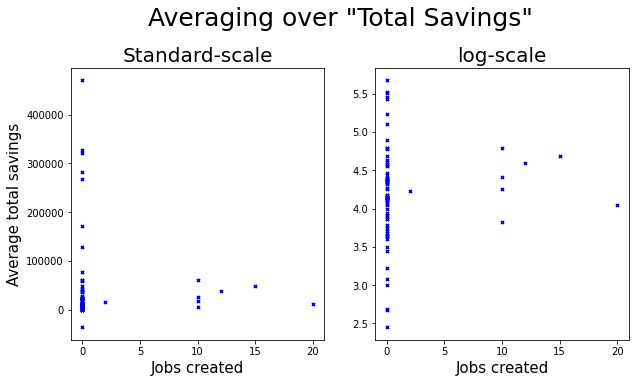

In [149]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
axes[0].scatter(x, yt, c='b', marker='x', s=10)
#ax.scatter(x, yb, c='r', marker='o', s=10, label='avg_benefit_savings')
axes[0].set_xlabel("Jobs created", fontsize=15)
axes[0].set_ylabel("Average total savings", fontsize=15)
axes[0].set_title("Standard-scale", fontsize=20)

axes[1].scatter(x, np.log10(yt), c='b', marker='x', s=10)
#ax.scatter(x, yb, c='r', marker='o', s=10, label='avg_benefit_savings')
axes[1].set_xlabel("Jobs created", fontsize=15)
axes[1].set_title("log-scale", fontsize=20)

fig.suptitle("Averaging over \"Total Savings\"", y=1.05, fontsize=25)

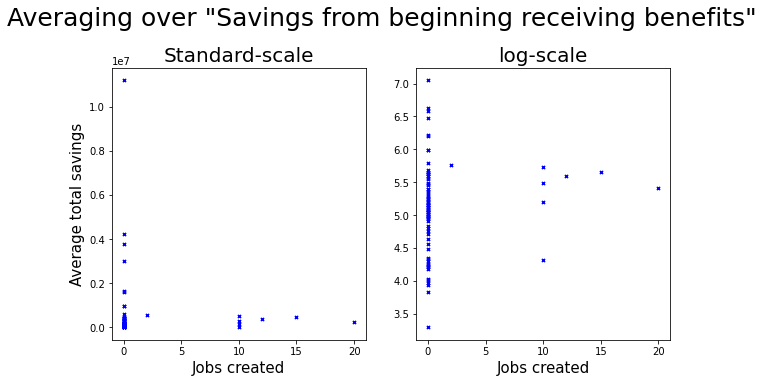

In [166]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
axes[0].scatter(x, yb, c='b', marker='x', s=10)
#ax.scatter(x, yb, c='r', marker='o', s=10, label='avg_benefit_savings')
axes[0].set_xlabel("Jobs created", fontsize=15)
axes[0].set_ylabel("Average total savings", fontsize=15)
axes[0].set_title("Standard-scale", fontsize=20)

axes[1].scatter(x, np.log10(yb), c='b', marker='x', s=10)
#ax.scatter(x, yb, c='r', marker='o', s=10, label='avg_benefit_savings')
axes[1].set_xlabel("Jobs created", fontsize=15)
axes[1].set_title("log-scale", fontsize=20)

_ = fig.suptitle("Averaging over \"Savings from beginning receiving benefits\"", y=1.05, fontsize=25)

### <span style="color:orange"> 2. Create a histogram of the log of the average total savings. </span>

##### NOTE: the log-scale cannot capture the existence of "negative" total savings

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Count')

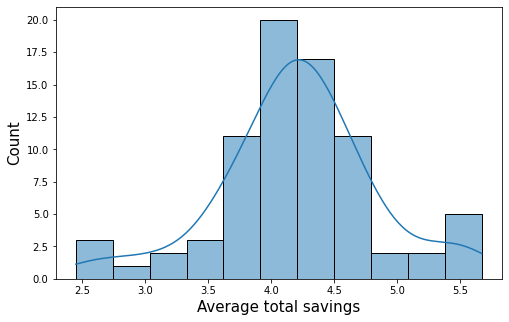

In [168]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(data=np.log10(yt), ax=ax, kde=True)
ax.set_xlabel("Average total savings", fontsize=15)
ax.set_ylabel("Count", fontsize=15)

### <span style="color:orange"> 3. Create a line plot of the total jobs created for each month. </span>

In [205]:
df5 = df.copy()
df5['Effective Date'] = pd.to_datetime(df5['Effective Date'])
df6 = df5.groupby(df5['Effective Date'].dt.strftime('%B')).agg({'Job created': sum})
df6

,Job created
Effective Date,
April,2.0
August,0.0
December,10.0
February,27.0
January,0.0
July,20.0
June,63.0
March,20.0
May,2.0


In [227]:
months = df6.index.tolist()
jobs_created = df6['Job created'].tolist()
dicts = {k:v for k,v in zip(months,jobs_created)}
months_sorted = sorted(months, key=lambda m: dt.datetime.strptime(m, "%B"))
jobs_created_sorted = [dicts[month] for month in months_sorted]

Text(0, 0.5, 'Total jobs created')

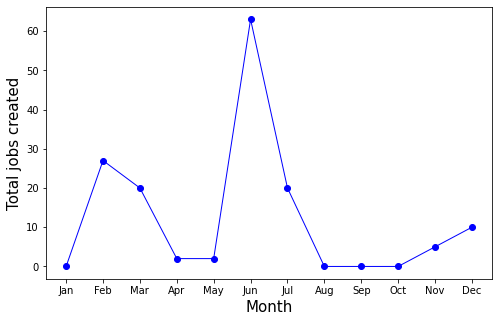

In [230]:
months_nums = np.arange(1,13)
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(months_nums, jobs_created_sorted, '-o', lw=1, c='b')
ax.set_xticks(months_nums)
ax.set_xticklabels(months_labels, fontsize=10)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Total jobs created', fontsize=15)